<a href="https://colab.research.google.com/github/DigDataSteve/Hotel_Data_Analysis/blob/main/Hotel_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Analyzing Data for Two Hotels

### Connect Google Drive with Colab

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Prepare Data For Analysis
1.   Check for null values and replace any null values with zero.
2.   Check for rooms with no people (adults, children, babies), assign this to a dataframe and then reverse the dataframe to obtain a table with occupied rooms

In [5]:
path = '/content/drive/MyDrive/Hotel_Bookings_Analysis/data/hotel_bookings.csv'
       
hotels = pd.read_csv(path)
hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [6]:
hotels.shape

(119390, 32)

In [7]:
#Determine if there are null values and if so how many per attribute
hotels.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
#replace null values with zeros via 'fillna' with the 'inplace' parameter set to 'True' to modify the existing dataframe and not create a new one.
hotels.fillna(0, inplace=True)
hotels.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [9]:
#list out table columsn and decide what information cannot be zero, in this case, a room shouuld have at least one person.
for c in hotels.columns:
  print(c)

hotel
is_canceled
lead_time
arrival_date_year
arrival_date_month
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
meal
country
market_segment
distribution_channel
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
reserved_room_type
assigned_room_type
booking_changes
deposit_type
agent
company
days_in_waiting_list
customer_type
adr
required_car_parking_spaces
total_of_special_requests
reservation_status
reservation_status_date


In [10]:
empty = (hotels['adults'] == 0) & (hotels['children'] == 0) & (hotels['babies'] == 0) 

#rather than remove the 'empty' rows, use the negated 'empty' dataframe, which will not contain the zeroed rows

occupied = hotels[~empty]

In [11]:
occupied.shape

(119210, 32)

### Analyzse What Countries Guests Came From
1.   Import necessary libraries
2.   Determine valid countries of guests

In [12]:
resort_hotel = occupied[(occupied['hotel'] == 'Resort Hotel') & (occupied['is_canceled'] == 0)]
city_hotel = occupied[(occupied['hotel'] == 'City Hotel') & (occupied['is_canceled'] == 0)]
city_hotel.shape + resort_hotel.shape

(46084, 32, 28927, 32)

In [13]:
import plotly.graph_objs as go 
from plotly.offline import iplot
import plotly.express as px 

In [14]:
#find the labels of the rows via counting the unique instances of countries and then using the 'index' property
labels = resort_hotel['country'].value_counts().index
values = resort_hotel['country'].value_counts()

In [15]:
trace = go.Pie(labels=labels, values=values,  hoverinfo='label + percent', textinfo='value')
fig = go.Figure([trace])
fig.update_traces(textfont_size=14, textposition='inside',
                  marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [16]:
country_data = occupied[occupied['is_canceled']==0]['country'].value_counts().reset_index()
country_data.columns = ['Country', 'Guest Total']
country_data.head()

,Country,Guest Total
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067


In [17]:
px.choropleth(country_data,
              locations=country_data['Country'],
              color=country_data['Guest Total'],
              hover_name=country_data['Country'],
              title='Nunber of Hotel Guests per Country'
              )


### Analyze the Reserved Room and Associated Price per Hotel
1.   Show price per night per room for each hotel.
2.   Show price per night variation over the year.

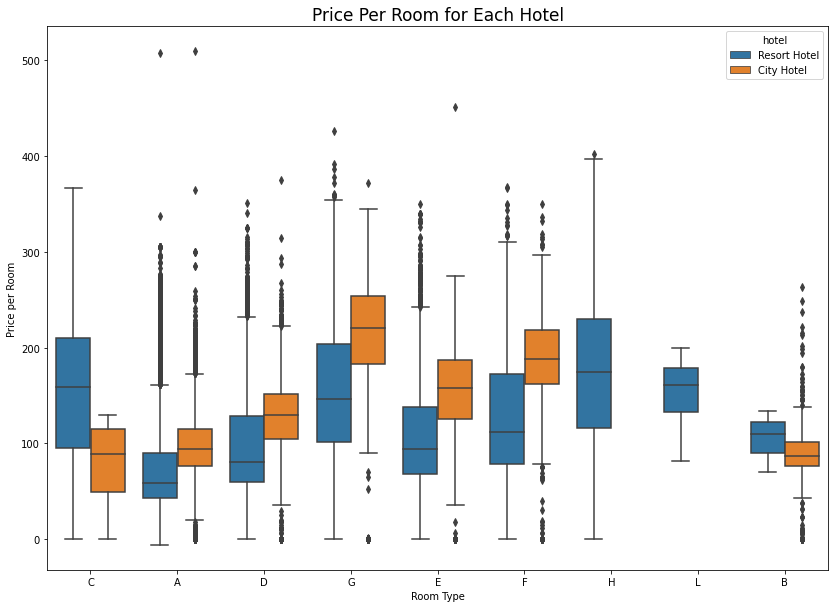

In [18]:
room_data = occupied[occupied['is_canceled']==0]

#Create a box plot to view price information per room type for each hotel
plt.figure(figsize=(14,10))
sns.boxplot(x='reserved_room_type', y='adr', hue='hotel', data=room_data)
plt.title('Price Per Room for Each Hotel', fontsize=17)
plt.xlabel('Room Type')
plt.ylabel('Price per Room')
plt.show()

In [19]:
resort_hotel_data = occupied[(occupied['is_canceled']==0) & (occupied['hotel'] == 'Resort Hotel')]
city_hotel_data = occupied[(occupied['is_canceled']==0) & (occupied['hotel'] == 'City Hotel')]

In [20]:
for c in resort_hotel_data.columns:
  print(c)

hotel
is_canceled
lead_time
arrival_date_year
arrival_date_month
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
meal
country
market_segment
distribution_channel
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
reserved_room_type
assigned_room_type
booking_changes
deposit_type
agent
company
days_in_waiting_list
customer_type
adr
required_car_parking_spaces
total_of_special_requests
reservation_status
reservation_status_date


In [21]:
resort_mn_avg_adr = resort_hotel_data.groupby('arrival_date_month')['adr'].mean().reset_index()
city_mn_avg_adr = city_hotel_data.groupby('arrival_date_month')['adr'].mean().reset_index()

In [22]:
#merge the two dataframes
final_df = resort_mn_avg_adr.merge(city_mn_avg_adr, on='arrival_date_month')
final_df.columns = ['Arrival Month', 'Resort Hotel Avg ADR', 'City Hotel Avg ADR']
final_df

,Arrival Month,Resort Hotel Avg ADR,City Hotel Avg ADR
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [23]:
!pip install sorted
!pip install sort-dataframeby-monthorweek

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3441 sha256=91be9ff60fadb59a8b6531dc67a5eb56c2a0f6d200d870ced43923c34b6b5348
  Stored in directory: /root/.cache/pip/wheels/f8/84/15/465a1c7eabab8605e82621b7aa658c99010f3564a43ccd06aa
Successfully built sort-dataframeby-monthorweek


In [24]:
pip install sorted-months-weekdays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3246 sha256=298d2c3726726dff6196055473823f22c2bcdc314e1e3a8b7cf2c7f3d8d2ba8a
  Stored in directory: /root/.cache/pip/wheels/9a/0d/2e/309df76f445367ea1777b73df0feb347b9c8d204ead35fdb10
Successfully built sorted-months-weekdays


In [25]:
import sort_dataframeby_monthorweek as sdm

In [26]:
result_df = sdm.Sort_Dataframeby_Month(final_df, 'Arrival Month')

In [27]:
result_df.head(12)

,Arrival Month,Resort Hotel Avg ADR,City Hotel Avg ADR
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [28]:
px.line(result_df, x='Arrival Month', y=['Resort Hotel Avg ADR', 'City Hotel Avg ADR'], title='Price per Night Over the Year')

# Analyzing Nights Spent at Hotel and Guest Preferences
1. Weekend Nights Spent at Hotels by Market Segment and Hotel Type
2. Guest Preference




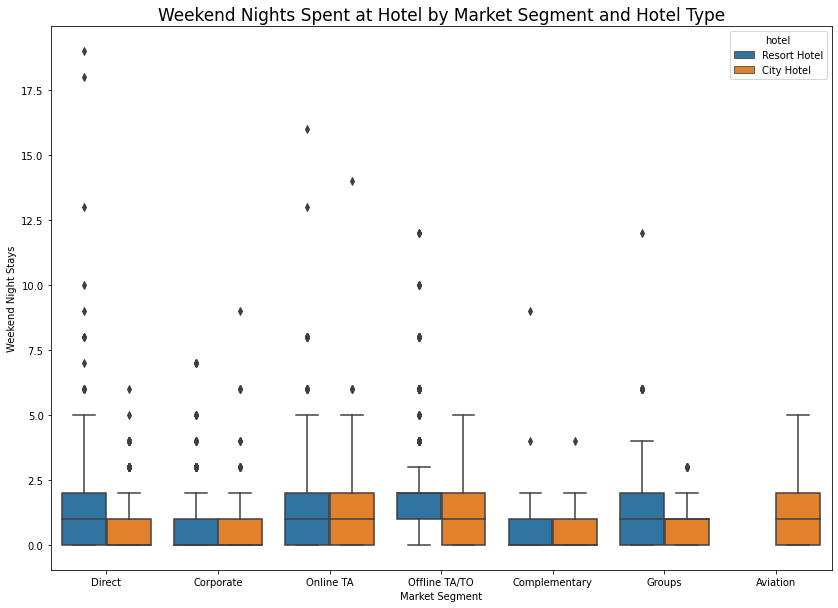

In [29]:
plt.figure(figsize=(14,10))
sns.boxplot(x='market_segment', y='stays_in_weekend_nights', data=room_data, hue='hotel')
plt.title('Weekend Nights Spent at Hotel by Market Segment and Hotel Type', fontsize=17)
plt.xlabel('Market Segment')
plt.ylabel('Weekend Night Stays')
plt.show()

In [30]:

px.pie(room_data, values=room_data['meal'].value_counts(), names=room_data['meal'].value_counts().index, hole=.55)

# Analyzing Special Requests and Cancellations
1. Analyze Customer Special Requests
2. Create a Pivot Table on Customer Special Requests and Cancellations

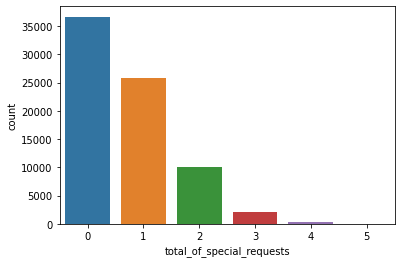

In [31]:
#Create a bar chart showing number of special requests
sns.countplot(x=room_data['total_of_special_requests'])

In [32]:
#Must use the original data (i.e. not filtered for occupied or unoccupied)
hotels.groupby(['total_of_special_requests', 'is_canceled']).agg({'total_of_special_requests':'count'}).rename(columns={'total_of_special_requests':'Totals'}).unstack()


Totals       
is_canceled                    0      1
total_of_special_requests              
0                          36762  33556
1                          25908   7318
2                          10103   2866
3                           2051    446
4                            304     36
5                             38      2

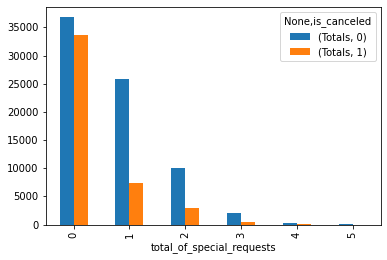

In [33]:
pivot=hotels.groupby(['total_of_special_requests', 'is_canceled']).agg({'total_of_special_requests':'count'}).rename(columns={'total_of_special_requests':'Totals'}).unstack()
pivot.plot(kind='bar')

# Which Months Have Highest Activity


*   Analyze the Guest Activity - What Months Are Busiest
Use the resort_hotel_data and city_hotel_data dataframes from before
*   Merge the dataframes
*   Plot the Arrivals by Month






In [65]:
resort_arrivals = resort_hotel_data['arrival_date_month'].value_counts().reset_index()
city_arrivals = city_hotel_data['arrival_date_month'].value_counts().reset_index()
resort_arrivals.columns=['Month', 'Arrival Total']
city_arrivals.columns=['Month', 'Arrival Total']

city_arrivals

,Month,Arrival Total
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [69]:
#merge the dataframes
arrival_data = resort_arrivals.merge(city_arrivals, on='Month')
arrival_data.columns = ['Month', 'Resort Hotel Arrival Total', 'City Hotel Arrival Total']

#sort the months
import sort_dataframeby_monthorweek as sdmw 
final_arrival_df = sdmw.Sort_Dataframeby_Month(arrival_data, 'Month')
final_arrival_df

,Month,Resort Hotel Arrival Total,City Hotel Arrival Total
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [75]:
px.line(data_frame=final_arrival_df, x='Month', y=['Resort Hotel Arrival Total', 'City Hotel Arrival Total'], title="Total Number of Guests Per Month")

# Analyze Stay Length and Bookings by Market 


1.   What is the number of days people stay?
2.   How does the booking per market segment look?

*Create and use a filter to work with non-cancelled guest data



In [79]:
#Create and use a filter to collect only non-cancelled reservations
filter = hotels['is_canceled'] == 0
hotel_stays = hotels[filter]

In [86]:
#import warning module to not show warnings
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
#add the weekend stays and week nights stays
hotel_stays['total_stays'] = hotel_stays['stays_in_weekend_nights'] + hotel_stays['stays_in_week_nights']


In [95]:
#Group by total nights (the new column) and hotel
hold_data = hotel_stays.groupby(['total_stays', 'hotel']).agg('count').reset_index()
total_stay_data=  hold_data.iloc[:,0:3]
total_stay_data.columns = ['Total Nights', 'Hotel Name', 'Total Stays']
total_stay_data.head()


,Total Nights,Hotel Name,Total Stays
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992


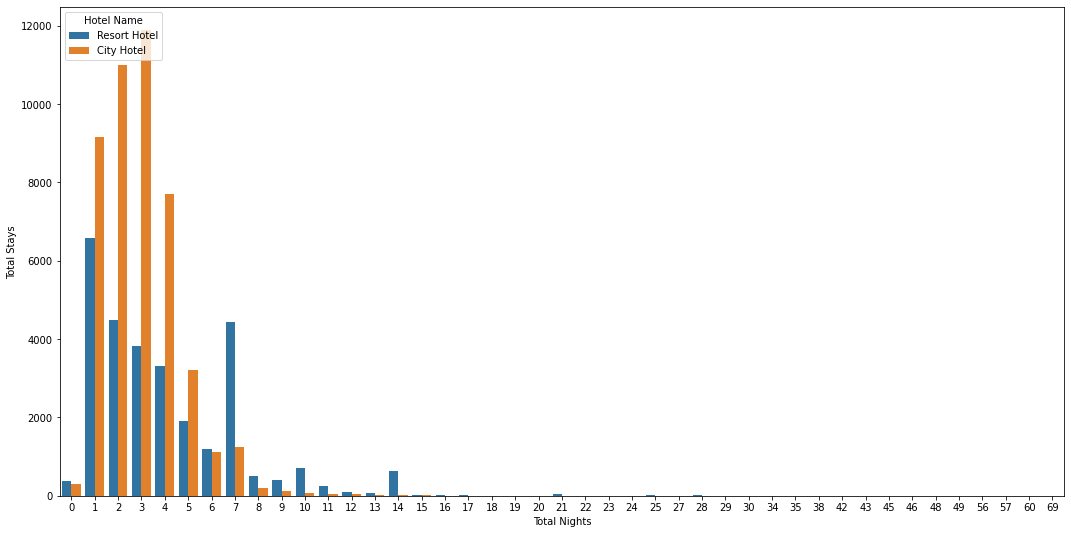

In [112]:
#Use a bar plot to visualize the total nunber of nightly stays, i.e. the number of days people stay
# **Rember to use the renamed columsn!
plt.figure(figsize=(18,9))
sns.barplot(data=total_stay_data, x='Total Nights', y='Total Stays', hue='Hotel Name', hue_order=['Resort Hotel', 'City Hotel'])

In [114]:
#Market segment analysis
hotel_stays['market_segment'].value_counts()

Online TA        35738
Offline TA/TO    15908
Direct           10672
Groups            7714
Corporate         4303
Complementary      646
Aviation           185
Name: market_segment, dtype: int64

In [117]:
px.pie(hotel_stays,values=hotel_stays['market_segment'].value_counts(),names=hotel_stays['market_segment'].value_counts().index,title="Bookings Per Market Segment")

# Analysis of Nighly Price and Cancellations


1.   Analyze Price Per Night by Market Segment and Room Type
2.   Nunber of Cancellations
3.   Month with Highest Number of Cancellations



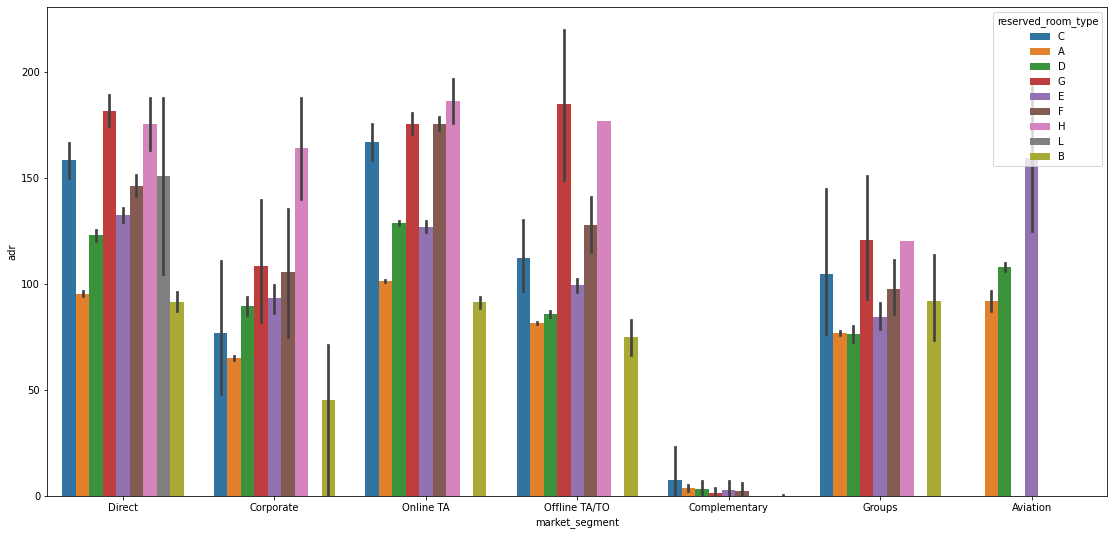

In [120]:
#Number of bookings by market segment and room type
plt.figure(figsize=(19,9))
sns.barplot(x='market_segment', y='adr', hue='reserved_room_type', data=hotel_stays)

In [122]:
#Number of Cancellations filter
canceled_rooms = hotels[hotels['is_canceled']==1]
canceled_rooms.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,0.0,0,Transient,82.0,0,1,Canceled,5/6/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,0.0,0,Transient,105.5,0,0,Canceled,4/22/2015
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,No Deposit,240.0,0.0,0,Transient,123.0,0,0,Canceled,6/23/2015
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,No Deposit,240.0,0.0,0,Transient,107.0,0,2,Canceled,5/11/2015
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,No Deposit,0.0,0.0,0,Transient,108.3,0,2,Canceled,5/29/2015


In [141]:
#Visualize cancellations by hotel
resort_hotel_cxl = len(canceled_rooms[canceled_rooms['hotel']=='Resort Hotel'])
city_hotel_cxl = len(canceled_rooms[canceled_rooms['hotel']=='City Hotel'])
px.pie(values=[resort_hotel_cxl, city_hotel_cxl], names=['Resort Hotel', 'City Hotel'])